In [ ]:
import pandas as pd
import numpy as np
import quandl as qd

df= qd.get('WIKI/GOOGL')

In [3]:
df['hl_pct'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'] * 100.0
df['pct_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100.0

df= df[['Adj. Close', 'hl_pct', 'pct_change', 'Adj. Volume']]

df.fillna(-9999, inplace= True)

import math
forecast_col= 'Adj. Close'
forecast_out= int(math.ceil(0.01*len(df)))
print forecast_out

df['label']= df[forecast_col].shift(-forecast_out)

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X= np.array(df.drop(['label'], axis= 1))
X= preprocessing.scale(X)

X_recent= X[-forecast_out:]
X= X[:-forecast_out]

df.dropna(inplace=True)
y= np.array(df['label'])

X_train, X_test, y_train, y_test= cross_validation.train_test_split(X, y, test_size= 0.2)

clf= LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

32


0.97091757402758605

In [5]:
forecasts= clf.predict(X_recent)
forecasts

array([ 814.28360981,  820.97983133,  823.68333061,  821.40453013,
        815.11175581,  818.55787004,  821.72133707,  818.05421253,
        816.30833755,  814.4946141 ,  816.04215814,  810.41068965,
        809.38661251,  797.89298267,  813.28456664,  813.81314156,
        819.46238228,  830.59184534,  833.19857485,  832.29860321,
        836.01696195,  835.5079312 ,  837.26044641,  833.31874436,
        835.3899985 ,  830.357995  ,  834.53027098,  849.57413779,
        855.23150864,  864.15896143,  861.97666005,  848.13551397])

In [22]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

In [7]:
df['forecast']= np.nan

In [8]:
df.tail()

,Adj. Close,hl_pct,pct_change,Adj. Volume,label,forecast
Date,,,,,,
2016-12-05,778.22,1.699079,1.067532,1680524.0,844.43,NaN
2016-12-06,776.18,1.546578,-0.513977,1694701.0,849.53,NaN
2016-12-07,791.47,2.387755,1.477018,2014582.0,858.45,NaN
2016-12-08,795.17,1.408165,0.279967,1603167.0,856.98,NaN
2016-12-09,809.45,1.491135,1.269861,1889430.0,845.03,NaN


In [ ]:
last_date= df.index.max()

In [24]:
next_unix= last_date + datetime.timedelta(days=1)

for i in forecasts:    
    next_date= next_unix
    df.ix[next_date]= [np.nan for _ in range(len(df.columns)-1)] +[i]
    next_unix += datetime.timedelta(days= 1) 

In [25]:
df.tail(34)

,Adj. Close,hl_pct,pct_change,Adj. Volume,label,forecast
2016-12-08,795.17,1.408165,0.279967,1603167.0,856.98,NaN
2016-12-09,809.45,1.491135,1.269861,1889430.0,845.03,NaN
2016-12-10,NaN,NaN,NaN,NaN,NaN,814.283610
2016-12-11,NaN,NaN,NaN,NaN,NaN,820.979831
2016-12-12,NaN,NaN,NaN,NaN,NaN,823.683331
2016-12-13,NaN,NaN,NaN,NaN,NaN,821.404530
2016-12-14,NaN,NaN,NaN,NaN,NaN,815.111756
2016-12-15,NaN,NaN,NaN,NaN,NaN,818.557870
2016-12-16,NaN,NaN,NaN,NaN,NaN,821.721337
2016-12-17,NaN,NaN,NaN,NaN,NaN,818.054213


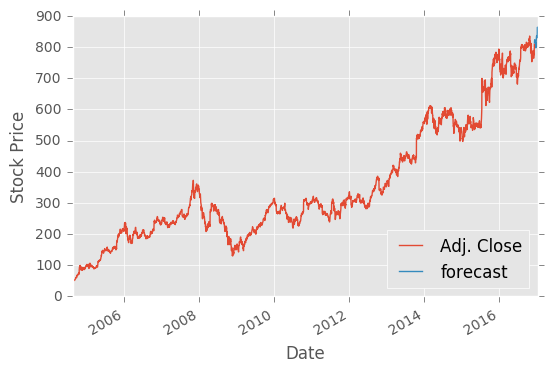

In [26]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [32]:
# import pickle as pkl
import cPickle as pkl

In [33]:
pkl.dump(clf, open('linear_reg.pickle', 'wb'))

In [34]:
clf2= pkl.load(open('linear_reg.pickle', 'rb'))

In [35]:
clf2.score(X_test, y_test)

0.97091757402758605